<a href="https://colab.research.google.com/github/KafilatAdeleke/Data_Science/blob/master/monthly_milk_production_with_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/monthly-milk-production-pounds.csv'

Load the data

In [ ]:
df= pd.read_csv(url)

In [ ]:
df

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [ ]:
 df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
 df.drop(168,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [ ]:
#rename columns
 
df.columns=["ds","y"]

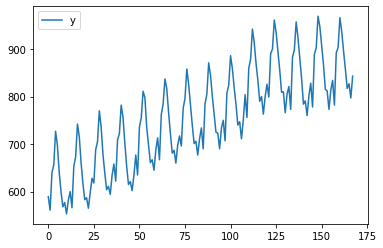

In [ ]:
 df.plot()

In [ ]:
df['ds'].dtype

dtype('O')

In [ ]:
 df['ds']=pd.to_datetime(df['ds'])

In [ ]:
df

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0
...,...,...
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0


In [ ]:
df["ds"].dtypes

dtype('<M8[ns]')

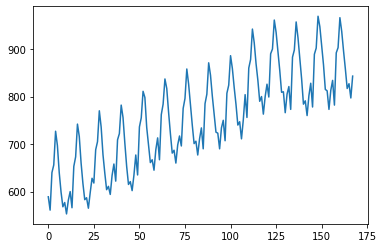

In [ ]:
df["y"].plot()

In [ ]:
 from fbprophet import Prophet

In [ ]:
 ## intiialize the Model
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
 model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [ ]:
 ## Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [ ]:
 ### Prediction
prediction=model.predict(future_dates)

In [ ]:
 prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.848249,576.522313,597.099818,606.848249,606.848249,-20.073390,-20.073390,-20.073390,-20.073390,-20.073390,-20.073390,0.0,0.0,0.0,586.774860
1,1962-02-01,608.572034,536.532845,555.626232,608.572034,608.572034,-62.557652,-62.557652,-62.557652,-62.557652,-62.557652,-62.557652,0.0,0.0,0.0,546.014381
2,1962-03-01,610.129000,632.455074,651.436436,610.129000,610.129000,31.436665,31.436665,31.436665,31.436665,31.436665,31.436665,0.0,0.0,0.0,641.565665
3,1962-04-01,611.852785,648.788585,668.277150,611.852785,611.852785,46.730075,46.730075,46.730075,46.730075,46.730075,46.730075,0.0,0.0,0.0,658.582860
4,1962-05-01,613.520963,711.453428,732.191180,613.520963,613.520963,108.043261,108.043261,108.043261,108.043261,108.043261,108.043261,0.0,0.0,0.0,721.564225


**Plotting the Forecasts** 

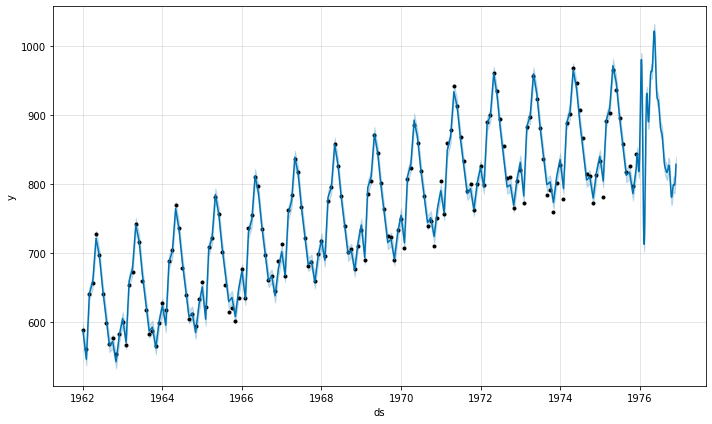

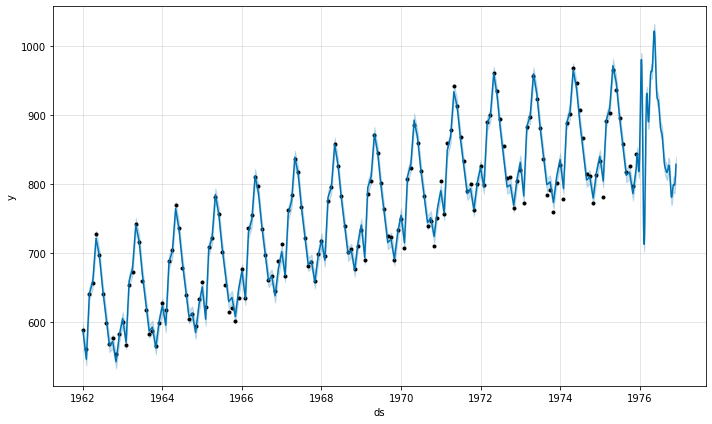

In [ ]:
#### plot the predicted projection
model.plot(prediction)

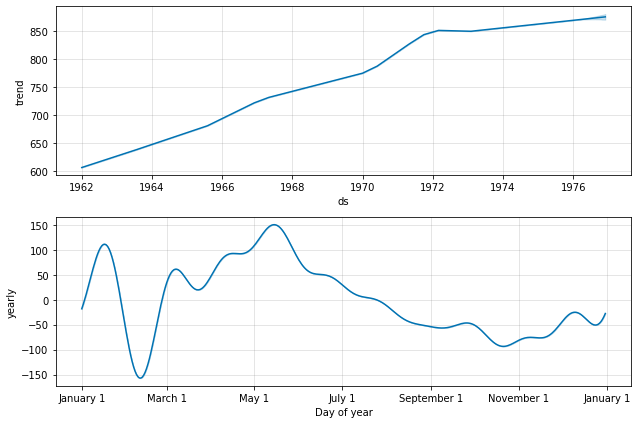

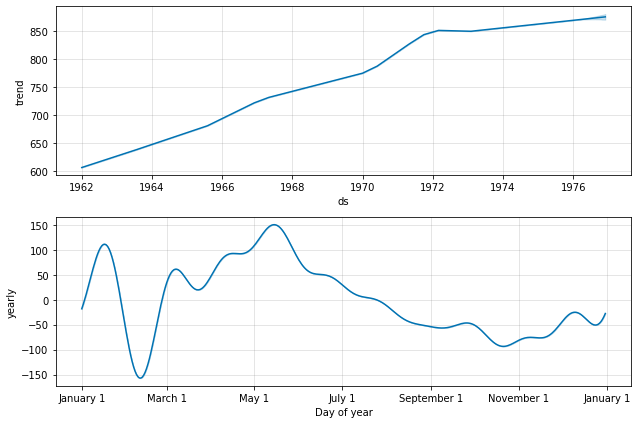

In [ ]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

**Cross Validation**

In [ ]:
from fbprophet.diagnostics import cross_validation


In [ ]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [ ]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,631.098104,628.506893,632.846066,622.0,1965-01-22
1,1965-03-01,715.100495,708.551346,721.028861,709.0,1965-01-22
2,1965-04-01,735.552474,721.351769,747.248562,722.0,1965-01-22
3,1965-05-01,806.443792,784.202931,825.219034,782.0,1965-01-22
4,1965-06-01,774.722057,743.622761,802.705652,756.0,1965-01-22


**Obtaining the Performance Metrics**

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,256.280704,16.008770,12.605681,0.016238,0.014528,0.32
1,41 days,254.154295,15.942217,12.519149,0.016164,0.014528,0.32
2,42 days,269.044308,16.402570,12.982869,0.016809,0.014573,0.32
3,43 days,269.417584,16.413945,13.091628,0.016979,0.014573,0.32
4,46 days,254.738535,15.960531,12.733113,0.016470,0.014528,0.32


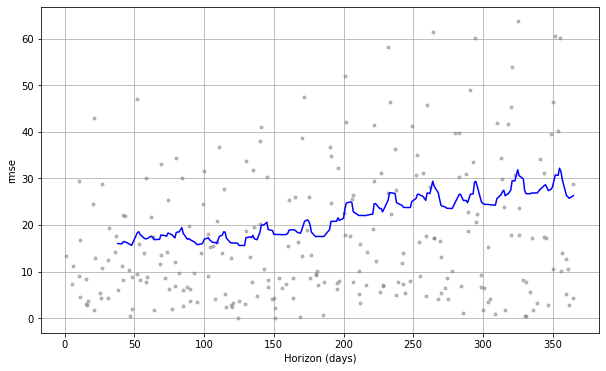

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')